In [172]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Visualization

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [173]:
bioData = pd.read_csv("dataset.csv")

In [174]:
bioData.head()

,Date,Time,RP,RC,RR,BV,MV,DTCY,ACT,SUB
0,9/1/2018,16:48:08:291,35.98228,0,20,0.879047,17.58095,66,Reading,Andrew
1,9/1/2018,16:48:08:352,36.07199,0,20,0.879047,17.58095,66,Reading,Andrew
2,9/1/2018,16:48:08:396,36.11691,0,20,0.879047,17.58095,66,Reading,Andrew
3,9/1/2018,16:48:08:441,36.16188,0,20,0.879047,17.58095,66,Reading,Andrew
4,9/1/2018,16:48:08:502,36.25196,0,20,0.879047,17.58095,66,Reading,Andrew


In [175]:
# Lets change the SUB categorical value into numerics
# Andrew, Betty, Charles, Coll, FD, Isan, Mel, Niuli, Sunwan, Zhao
temp = []
for i in bioData.SUB:
    if i == "Andrew": temp.append(0)
    if i == "Betty": temp.append(1)
    if i == "Charles": temp.append(2)
    if i == "Coll": temp.append(3)
    if i == "FD": temp.append(4)
    if i == "Isan": temp.append(5)
    if i == "Mel": temp.append(6)
    if i == "Niuli": temp.append(7)
    if i == "Sunwan": temp.append(8)
    if i == "Zhao": temp.append(9)
bioData["n_Subject"] = temp

In [176]:
bioData.head()

,Date,Time,RP,RC,RR,BV,MV,DTCY,ACT,SUB,n_Subject
0,9/1/2018,16:48:08:291,35.98228,0,20,0.879047,17.58095,66,Reading,Andrew,0
1,9/1/2018,16:48:08:352,36.07199,0,20,0.879047,17.58095,66,Reading,Andrew,0
2,9/1/2018,16:48:08:396,36.11691,0,20,0.879047,17.58095,66,Reading,Andrew,0
3,9/1/2018,16:48:08:441,36.16188,0,20,0.879047,17.58095,66,Reading,Andrew,0
4,9/1/2018,16:48:08:502,36.25196,0,20,0.879047,17.58095,66,Reading,Andrew,0


In [177]:
# Now lets drop the SUB column
bioData.drop(["Date", "Time", "SUB"] , axis = 1 , inplace = True)

In [178]:
bioData.head()

,RP,RC,RR,BV,MV,DTCY,ACT,n_Subject
0,35.98228,0,20,0.879047,17.58095,66,Reading,0
1,36.07199,0,20,0.879047,17.58095,66,Reading,0
2,36.11691,0,20,0.879047,17.58095,66,Reading,0
3,36.16188,0,20,0.879047,17.58095,66,Reading,0
4,36.25196,0,20,0.879047,17.58095,66,Reading,0


In [179]:
X = bioData.iloc[:, 0:7].values
y = bioData.iloc[:, 7].values

In [180]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
labelencoder_X = LabelEncoder()
X[:, 6] = labelencoder_X.fit_transform(X[:, 6])

onehotencoder = OneHotEncoder(categorical_features = [6])
X = onehotencoder.fit_transform(X).toarray()

In [181]:
# Take care of dummy variable trap
# X = X[:,:-1]
X = X[:,1:]

In [182]:
X

array([[ 0.       ,  0.       , 35.98228  , ...,  0.8790474, 17.58095  ,
        66.       ],
       [ 0.       ,  0.       , 36.07199  , ...,  0.8790474, 17.58095  ,
        66.       ],
       [ 0.       ,  0.       , 36.11691  , ...,  0.8790474, 17.58095  ,
        66.       ],
       ...,
       [ 0.       ,  1.       , 27.1028   , ...,  0.8089771,  8.089771 ,
        33.       ],
       [ 0.       ,  1.       , 27.1028   , ...,  0.8089771,  8.089771 ,
        33.       ],
       [ 0.       ,  1.       , 27.17493  , ...,  0.8089771,  8.089771 ,
        33.       ]])

In [183]:
# 3 classes to classify
# n_classes = 3

In [184]:
# y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
# n_classes = y.shape[1]

In [185]:
# Splitting the data into training set and test set
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25, random_state=101)

In [186]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.fit_transform(testX)

In [187]:
print(trainX.shape , trainY.shape)
print(testX.shape , testY.shape)

(154671, 8) (154671,)
(51557, 8) (51557,)


In [188]:
# Part two - Time for the ANN
# import the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam
from keras import regularizers


In [189]:
# Initialize the ANN
# model = Sequential()

# # Adding the input layer and the first hidden layer
# #model.add(Dense(64, input_dim=trainX.shape[1] , activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)))
# model.add(Dense(64, input_dim=trainX.shape[1] , activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(196, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(10, activation='sigmoid'))

# metrics_list = ['accuracy', 'mse', 'mae', 'mape', 'cosine']
# model.compile(optimizer = Adam(lr = 0.01, decay=0.01/50),loss='sparse_categorical_crossentropy', metrics=metrics_list)

In [190]:
# Initialize the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(64, input_dim=trainX.shape[1] , activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)))
#model.add(Dense(64, input_dim=trainX.shape[1] , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(10, activation='sigmoid'))

metrics_list = ['accuracy', 'mse', 'mae', 'mape', 'cosine']
#metrics_list = ['accuracy']

In [191]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(model.compile(optimizer = Adam(lr = 0.01, decay=0.01/50),loss='sparse_categorical_crossentropy', metrics=metrics_list))

In [192]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dense_45 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_46 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_47 (Dense)             (None, 32)                6304      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
__________

In [156]:
#Taking necessary callbacks of checkpointing and learning rate reducer.
filepath="HAR_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint, LearningRateScheduler

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.5, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint,lr_reduce]

In [157]:
history = model.fit(trainX, trainY, epochs=50, batch_size=256, validation_data=(testX, testY), callbacks=callbacks_list)

#history = model.fit(trainX, trainY, epochs=50, batch_size=256, validation_data=(testX, testY), callbacks=callbacks_list)

Train on 154671 samples, validate on 51557 samples
Epoch 1/50
153088/154671 [============================>.] - ETA: 0s - loss: 1.2433 - acc: 0.4695 - mean_squared_error: 26.9203 - mean_absolute_error: 4.4267 - mean_absolute_percentage_error: 18563408.3395 - cosine_proximity: -1.6250
Epoch 00001: val_acc improved from -inf to 0.64022, saving model to HAR_weights.hdf5
154671/154671 [==============================] - 7s 46us/step - loss: 1.2416 - acc: 0.4705 - mean_squared_error: 26.9177 - mean_absolute_error: 4.4264 - mean_absolute_percentage_error: 18495073.9896 - cosine_proximity: -1.6234 - val_loss: 0.8546 - val_acc: 0.6402 - val_mean_squared_error: 27.4063 - val_mean_absolute_error: 4.4814 - val_mean_absolute_percentage_error: 11990092.7561 - val_cosine_proximity: -1.3608
Epoch 2/50
154368/154671 [============================>.] - ETA: 0s - loss: 0.9444 - acc: 0.6373 - mean_squared_error: 27.9071 - mean_absolute_error: 4.5129 - mean_absolute_percentage_error: 7021066.7554 - cosine_pr

Epoch 13/50
153600/154671 [============================>.] - ETA: 0s - loss: 0.4205 - acc: 0.8664 - mean_squared_error: 28.7786 - mean_absolute_error: 4.5894 - mean_absolute_percentage_error: 884197.9571 - cosine_proximity: -1.0782
Epoch 00013: val_acc improved from 0.89336 to 0.89511, saving model to HAR_weights.hdf5
154671/154671 [==============================] - 5s 30us/step - loss: 0.4201 - acc: 0.8666 - mean_squared_error: 28.7751 - mean_absolute_error: 4.5893 - mean_absolute_percentage_error: 882562.8795 - cosine_proximity: -1.0781 - val_loss: 0.3267 - val_acc: 0.8951 - val_mean_squared_error: 28.7303 - val_mean_absolute_error: 4.5853 - val_mean_absolute_percentage_error: 548801.6043 - val_cosine_proximity: -1.0244
Epoch 14/50
154624/154671 [============================>.] - ETA: 0s - loss: 0.4036 - acc: 0.8724 - mean_squared_error: 28.7824 - mean_absolute_error: 4.5899 - mean_absolute_percentage_error: 827875.1819 - cosine_proximity: -1.0705
Epoch 00014: val_acc improved from 0

Epoch 36/50
153344/154671 [============================>.] - ETA: 0s - loss: 0.1824 - acc: 0.9441 - mean_squared_error: 28.8285 - mean_absolute_error: 4.5948 - mean_absolute_percentage_error: 692771.5881 - cosine_proximity: -0.9883
Epoch 00036: val_acc improved from 0.96658 to 0.96683, saving model to HAR_weights.hdf5
154671/154671 [==============================] - 5s 32us/step - loss: 0.1825 - acc: 0.9441 - mean_squared_error: 28.8207 - mean_absolute_error: 4.5939 - mean_absolute_percentage_error: 693831.5505 - cosine_proximity: -0.9882 - val_loss: 0.1139 - val_acc: 0.9668 - val_mean_squared_error: 28.7503 - val_mean_absolute_error: 4.5883 - val_mean_absolute_percentage_error: 586545.4212 - val_cosine_proximity: -0.9598
Epoch 37/50
153856/154671 [============================>.] - ETA: 0s - loss: 0.1822 - acc: 0.9431 - mean_squared_error: 28.8243 - mean_absolute_error: 4.5945 - mean_absolute_percentage_error: 664629.1006 - cosine_proximity: -0.9882
Epoch 00037: val_acc did not improve

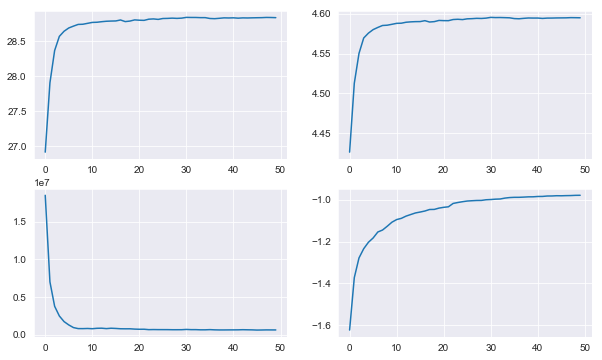

In [158]:
from matplotlib import pyplot

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
mse = ax=axes[0, 0].plot(history.history['mean_squared_error'])
mae = ax=axes[0, 1].plot(history.history['mean_absolute_error'])
mape = ax=axes[1, 0].plot(history.history['mean_absolute_percentage_error'])
cos_p = ax=axes[1, 1].plot(history.history['cosine_proximity'])


In [159]:
# Evaluate the network
print("[INFO] evaluating network...")
# from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report , accuracy_score, roc_curve, auc, confusion_matrix
# from sklearn.metrics import confusion_matrix
model.load_weights("HAR_weights.hdf5")

y_pred = model.predict(testX)
y_pred = np.argmax(y_pred, axis = 1) 

cm = confusion_matrix(testY, y_pred)
print(cm)

[INFO] evaluating network...
[[3254    0  107    0    0    0  204    0   37    0]
 [   0 3553    1   16    0    7    0   40    7    0]
 [ 110    0 9059    0   12    0   10    0    4    0]
 [   0   17    0 4979    0   10    0   75    0   46]
 [   0    0   11    0 4006    0    0    0    0    3]
 [   0    2    0   26    0 3839    0   16    6   14]
 [  29    0    0    0    0    0 4144    1   18    0]
 [   4    5    0   31    0    7    3 7004   15   36]
 [ 171    1   43    2    4   30   23    5 7530    1]
 [   0    0    0   52   19    9    0   32    6 2861]]


In [160]:
# evaluate the network
print("[INFO] evaluating network...")
print(classification_report(testY, y_pred))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.91      0.90      0.91      3602
          1       0.99      0.98      0.99      3624
          2       0.98      0.99      0.98      9195
          3       0.98      0.97      0.97      5127
          4       0.99      1.00      0.99      4020
          5       0.98      0.98      0.98      3903
          6       0.95      0.99      0.97      4192
          7       0.98      0.99      0.98      7105
          8       0.99      0.96      0.98      7810
          9       0.97      0.96      0.96      2979

avg / total       0.97      0.97      0.97     51557



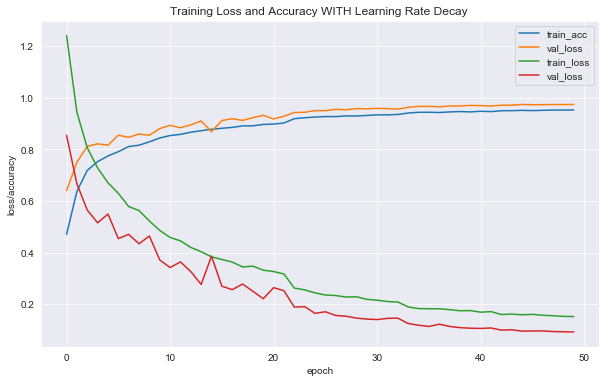

In [161]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
plt.plot(history.history['acc'], label="train_acc")
plt.plot(history.history['val_acc'], label="val_loss")
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('Training Loss and Accuracy WITH Learning Rate Decay ')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [162]:
# Binarize the output for ROC curve
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = y.shape[1]

In [163]:
# After that rerun the split again
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25, random_state=101)

In [164]:
# Feature Scaling again
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.fit_transform(testX)

In [165]:
# Now print the shape
print(trainX.shape , trainY.shape)
print(testX.shape , testY.shape)

(154671, 8) (154671, 10)
(51557, 8) (51557, 10)


In [166]:
#y_score = classifier.fit(trainX, trainY).decision_function(testX)
y_score = model.predict_proba(testX)
y_pred = model.predict(testX)
y_pred = np.argmax(y_pred, axis = 1) 

In [167]:
y_score

array([[1.1920929e-07, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.6155999e-02,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.9264262e-03, 0.0000000e+00],
       ...,
       [2.1787882e-02, 0.0000000e+00, 5.9604645e-08, ..., 0.0000000e+00,
        5.9604645e-08, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.9038143e-02, 0.0000000e+00, 2.6524067e-06, ..., 2.9802322e-08,
        2.9180828e-03, 3.2463372e-17]], dtype=float32)

In [168]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testY[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [169]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testY.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


In [170]:
####### Compute macro-average ROC curve and ROC area #########
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

from scipy import interp
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


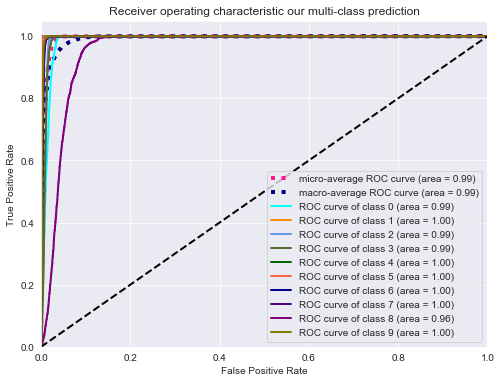

In [171]:
# Plot all ROC curves
from itertools import cycle

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua','darkorange','cornflowerblue','darkolivegreen','darkgreen',
                'tomato', 'darkblue','indigo','purple','olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic our multi-class prediction')
plt.legend(loc="lower right")
plt.show()